# PART1

# 1. loading libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot


# 2. Load Data

In [143]:
data = pd.read_excel('Train_dataset.xlsx')
pred = pd.read_excel('Test_dataset.xlsx')
# Seaborn visualization library
# import seaborn as sns
# # Create the default pairplot
# sns.pairplot(data)

In [144]:

data.info()
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 

#drop id/name/designation

In [145]:
#drop id/name/for training
data = data.drop(columns=['people_ID','Designation', 'Name'])
pred1 = pred.drop(columns=['people_ID','Designation', 'Name'])
 
#dropping Designation beacause Designation Derived attribute from gender

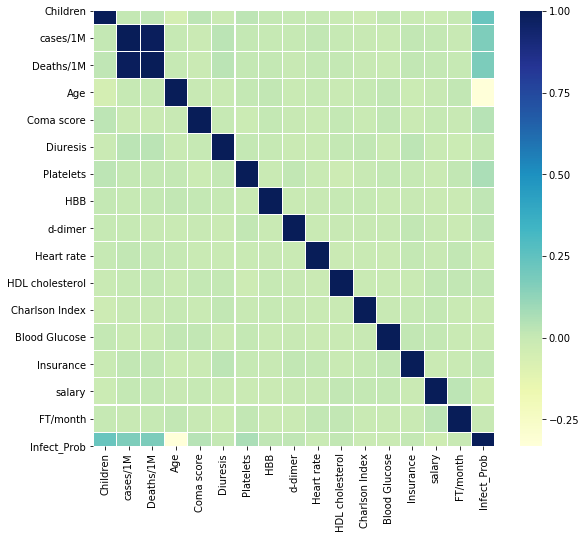

In [146]:
# GETTING Correllation matrix
import seaborn as sns
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [147]:
data.head()

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,Bhubaneshwar,Female,YES,1.0,Farmer,Public,2,0,Hypertension,68,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,Bhubaneshwar,Female,YES,2.0,Farmer,Walk,2,0,Diabetes,64,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,Bhubaneshwar,Female,NO,1.0,Cleaner,Public,2,0,None,19,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,Bhubaneshwar,Female,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,Bhubaneshwar,Female,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


# 3 . Preprocessing

# 3.1 Imputing missing values

In [148]:
# Categorical columns
cat_data = data.select_dtypes(include=['object']).copy()
pred_cat_data = pred1.select_dtypes(include=['object']).copy()
# print("Missing values:")
# print(cat_data.isnull().sum())
# print("\nafter filling:")
cat_data = cat_data.fillna(cat_data.mode().index[0])
# print(cat_data.isnull().sum())

cat_data.head()


,Region,Gender,Married,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
0,Bhubaneshwar,Female,YES,Farmer,Public,Hypertension,<400,Normal
1,Bhubaneshwar,Female,YES,Farmer,Walk,Diabetes,<100,Stage-02
2,Bhubaneshwar,Female,NO,Cleaner,Public,None,<300,Elevated
3,Bhubaneshwar,Female,YES,Driver,Car,Coronary Heart Disease,<200,Stage-01
4,Bhubaneshwar,Female,NO,Manufacturing,Car,Diabetes,<400,Normal


# 3.2 Categorical Encoding

In [149]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cat_data)
cat_data = encoder.fit_transform(cat_data)

pred_cat_data= encoder.transform(pred_cat_data)

In [150]:
cat_data

,Region_0,Region_1,Region_2,Region_3,Gender_0,Gender_1,Married_0,Married_1,Occupation_0,Occupation_1,...,comorbidity_1,comorbidity_2,comorbidity_3,Pulmonary score_0,Pulmonary score_1,Pulmonary score_2,cardiological pressure_0,cardiological pressure_1,cardiological pressure_2,cardiological pressure_3
0,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,1,0,1,1,0,0,0,...,0,1,1,0,1,1,0,0,1,1
3,0,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
4,0,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,0,1,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
10710,0,1,0,1,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
10711,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
10712,0,1,0,1,1,0,0,1,0,1,...,1,0,0,0,1,1,0,0,1,1


In [151]:
# Numerical columns
f_data = data.select_dtypes(include=['float64'])
# print("Missing values:")
# print(f_data.isnull().sum())
# print("\nafter filling:")
f_data = f_data.fillna(f_data.mode().index[0])
# print(f_data.isnull().sum())
pred_f_data  = pred1[['Children','Diuresis','Platelets','HBB','d-dimer','Heart rate','HDL cholesterol','Insurance','FT/month']]           
f_data.info()
pred_f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 10 columns):
Children           10714 non-null float64
Diuresis           10714 non-null float64
Platelets          10714 non-null float64
HBB                10714 non-null float64
d-dimer            10714 non-null float64
Heart rate         10714 non-null float64
HDL cholesterol    10714 non-null float64
Insurance          10714 non-null float64
FT/month           10714 non-null float64
Infect_Prob        10714 non-null float64
dtypes: float64(10)
memory usage: 837.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 9 columns):
Children           14498 non-null int64
Diuresis           14498 non-null int64
Platelets          14498 non-null int64
HBB                14498 non-null int64
d-dimer            14498 non-null int64
Heart rate         14498 non-null int64
HDL cholesterol    14498 non-null int64
Insurance          14498 non-null int64


In [152]:
# Numerical columns
i_data = data.select_dtypes(include=['int64'])
pred_i_data = pred1[["cases/1M","Deaths/1M","Age","Coma score","Charlson Index","Blood Glucose","salary"]]
i_data = i_data.fillna(i_data.mode().index[0])

i_data.info()
pred_i_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 7 columns):
cases/1M          10714 non-null int64
Deaths/1M         10714 non-null int64
Age               10714 non-null int64
Coma score        10714 non-null int64
Charlson Index    10714 non-null int64
Blood Glucose     10714 non-null int64
salary            10714 non-null int64
dtypes: int64(7)
memory usage: 586.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 7 columns):
cases/1M          14498 non-null int64
Deaths/1M         14498 non-null int64
Age               14498 non-null int64
Coma score        14498 non-null int64
Charlson Index    14498 non-null int64
Blood Glucose     14498 non-null int64
salary            14498 non-null int64
dtypes: int64(7)
memory usage: 793.0 KB


# 3.3. Merge all processed dfs

In [153]:
data1 = pd.concat([cat_data,i_data,f_data], axis=1)
pred2 = pd.concat([pred_cat_data,pred_i_data,pred_f_data], axis=1)

In [154]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,-1]


# 3.4 Feature Scaling

In [155]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler(feature_range =(0, 1))
x =  sc_x.fit_transform(x)
pred2= sc_x.fit_transform(pred2)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [157]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(pred2.shape)


(7178, 43)
(3536, 43)
(7178,)
(3536,)
(14498, 43)


In [158]:
#Cross Validation function
n_folds = 5
from sklearn.model_selection import KFold
from math import sqrt

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [159]:
print(len(X_train))

7178


In [ ]:
from sklearn import svm 
from sklearn.metrics import mean_squared_error
svm_reg=svm.SVR(kernel="linear")
from sklearn.feature_selection import RFECV
selector = RFECV(svm_reg, cv=2)
selector.fit(X_train, y_train)


In [120]:
print(selector.ranking_)
# print((fit.support_))
b=[]
a = (selector.ranking_)
for i in range(len(a)):
    if(a[i]==1):
        b.append(i)
        
X_train1 = X_train[:,b]
X_test1 = X_test[:,b]
pred2= pred2[:,b]




[6 1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 4 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


# 4. Fitting the models

# Multiple Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import statistics 
linear_reg = LinearRegression()
rfe = RFE(linear_reg, 20)
fit = rfe.fit(X_train,y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


# # evaluate the model
# r2_score = linear_reg.score(X_test,y_test)
# print("R2 Score: " , r2_score)
# # linear_reg.fit(X_train,y_train)
# print("Trained model :: ", linear_reg)


Num Features: 20
Selected Features: [False  True  True  True False False  True  True False False  True False
 False  True False False False False False False  True  True False False
  True  True False  True  True False  True False False  True  True False
  True  True False  True False  True False]
Feature Ranking: [24  1  1  1  6  7  1  1  9  5  1 12 14  1 15 21  8 19 20 23  1  1  3 10
  1  1 18  1  1 17  1 13  4  1  1 16  1  1 22  1  2  1 11]


In [91]:
# print((fit.support_))
b=[]
a = (fit.ranking_)
for i in range(len(a)):
    if(a[i]==1):
        b.append(i)
        
X_train1 = X_train[:,b]
X_test1 = X_test[:,b]




(14498, 20)


In [121]:

print(X_train1.shape)

print(X_test1.shape)

(7178, 38)
(3536, 38)


In [123]:

linear_reg.fit(X_train1,y_train)
print("Trained model :: ", linear_reg)
# evaluate the model
r2_score = linear_reg.score(X_test1,y_test)
print("R2 Score: " , r2_score)


Trained model ::  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Score:  0.25942909326526287


# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=3)

regr_1.fit(X_train1, y_train)
regr_2.fit(X_train1, y_train)
regr_3.fit(X_train1, y_train)

print("Regressor tree 1(Depth=2):")
print("R2 Score: " ,regr_1.score(X_test1,y_test))

print("\nRegressor tree 2(Depth=5):")
print("R2 Score: " ,regr_2.score(X_test1,y_test))


# Lasso Regressor

In [125]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train1,y_train)
clf.score(X_test1,y_test)

0.2547917212466988

# 4.3 Random Forest

In [129]:
# fit the model - Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

model = RandomForestRegressor(n_estimators = 100,random_state=0)
model.fit(X_train1,y_train)
print("Trained model :: ", model)
# evaluate the model
expected_y  = y_test
predicted_y = model.predict(X_test1)
print("R2 Score:",metrics.r2_score(expected_y, predicted_y))


Trained model ::  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
R2 Score: 0.29016762346315084


# SVM Regression 

In [126]:
from sklearn import svm 
from sklearn.metrics import mean_squared_error
svm_reg=svm.SVR()
svm_reg.fit(X_train1,y_train)
svm_reg.score(X_test1,y_test)



0.27096288805562085

# Ridge Regression

In [127]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train1,y_train)
print(ridge.score(X_test1,y_test))



0.25979623685186204


0.2943135961974592

# MLP

In [131]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
model = MLPRegressor()
model.fit(X_train1, y_train)
print(); print(model)

# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test1)

# summarize the fit of the model
print("R2 Score:",metrics.r2_score(expected_y, predicted_y))



MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
R2 Score: 0.276457625485495


C:\Users\samar\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#  GRADIENTBOOSTINGREGRESSOR

In [160]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor()
# .fit(X_train1, y_train)
# est.score(X_test1,y_test)
from sklearn.feature_selection import RFECV
selector = RFECV(est, cv=2)
selector.fit(X_train, y_train)



RFECV(cv=2,
      estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                          criterion='friedman_mse', init=None,
                                          learning_rate=0.1, loss='ls',
                                          max_depth=3, max_features=None,
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100,
                                          n_iter_no_change=None,
                                          presort='deprecated',
                                          random_state=None, subsample=1.0,
                                  

In [161]:
print(selector.ranking_)
# print((fit.support_))
b=[]
a = (selector.ranking_)
for i in range(len(a)):
    if(a[i]==1):
        b.append(i)
        
X_train1 = X_train[:,b]
X_test1 = X_test[:,b]
pred2= pred2[:,b]



[37 24 36 35 32 31  9 11 30 29 12 16 19 28 22 26 25 15 27 18 17 33 20 34
 13 23 21  1  1  1  8  4 10  3  1  1  1  1  2  7  5  6 14]


In [162]:

est = GradientBoostingRegressor().fit(X_train1, y_train)
est.score(X_test1,y_test)


0.2979991379156989

# Predicting on Test_dataset

In [163]:
ans = est.predict(pred2)

In [167]:
df = pd.DataFrame (ans)
dd = pd.concat([pred['people_ID'],df], axis=1)

## save to xlsx file

filepath = 'ans_p1.xlsx'

dd.to_excel(filepath, index=False)